# Mapping the Results in GeoPandas

The zip file containing the SHP file is too large to upload to GitHub, you can either use Geocode or you can download the zip file here: https://data.cityofnewyork.us/Housing-Development/Shapefiles-and-base-map/2k7f-6s2k

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import seaborn as sns
import numpy as np

import descartes
import geopandas as gpd
import geoplot
from shapely.geometry import Point, Polygon
import geodatasets

In [12]:
pd.set_option('display.max_columns', None)

# import the data
nyc_inspections_df = pd.read_csv('cleaned_data.csv')

# filter for inspections performed after year 2000
nyc_inspections_df['inspection_date'] = pd.to_datetime(nyc_inspections_df['inspection_date'], errors='coerce')
nyc_inspections_df = nyc_inspections_df[nyc_inspections_df['inspection_date'].dt.year > 2000]

In [13]:
bronx = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["borough"] == "Bronx"])
queens = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["borough"] == "Queens"])
manhattan = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["borough"] == "Manhattan"])
brooklyn = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["borough"] == "Brooklyn"])
staten_island = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["borough"] == "Staten Island"])

top_bronx = pd.DataFrame(bronx.groupby(["record_id", "restaurant_name", "longitude", "latitude"])["score"].mean().sort_values(ascending = True).head(3)).reset_index()
bottom_bronx = pd.DataFrame(bronx.groupby(["record_id", "restaurant_name", "longitude", "latitude"])["score"].mean().sort_values(ascending = False).head(3)).reset_index()
top_queens = pd.DataFrame(queens.groupby(["record_id", "restaurant_name", "longitude", "latitude"])["score"].mean().sort_values(ascending = True).head(3)).reset_index()
bottom_queens = pd.DataFrame(queens.groupby(["record_id", "restaurant_name", "longitude", "latitude"])["score"].mean().sort_values(ascending = False).head(3)).reset_index()
top_manhattan = pd.DataFrame(manhattan.groupby(["record_id", "restaurant_name", "longitude", "latitude"])["score"].mean().sort_values(ascending = True).head(3)).reset_index()
bottom_manhattan = pd.DataFrame(manhattan.groupby(["record_id", "restaurant_name", "longitude", "latitude"])["score"].mean().sort_values(ascending = False).head(3)).reset_index()
top_brooklyn = pd.DataFrame(brooklyn.groupby(["record_id", "restaurant_name", "longitude", "latitude"])["score"].mean().sort_values(ascending = True).head(3)).reset_index()
bottom_brooklyn = pd.DataFrame(brooklyn.groupby(["record_id", "restaurant_name", "longitude", "latitude"])["score"].mean().sort_values(ascending = False).head(3)).reset_index()
top_staten = pd.DataFrame(staten_island.groupby(["record_id", "restaurant_name", "longitude", "latitude"])["score"].mean().sort_values(ascending = True).head(3)).reset_index()
bottom_staten = pd.DataFrame(staten_island.groupby(["record_id", "restaurant_name", "longitude", "latitude"])["score"].mean().sort_values(ascending = False).head(3)).reset_index()

In [14]:
# zipfile = open('nyc_geo.zip', 'rb')
# nyc_map = gpd.read_file(zipfile)

In [15]:
boros = gpd.read_file(geodatasets.get_path("nybb"))
boro_locations = gpd.tools.geocode(boros.BoroName)

In [16]:
boro_locations["name"] = ["Staten Island", "Queens", "Brooklyn", "Manhattan", "The Bronx"]

In [17]:
crs = {'init':'epsg:4326'}
best_worst = pd.concat([top_bronx, top_brooklyn, top_manhattan, top_queens, top_staten, bottom_bronx, bottom_brooklyn, bottom_manhattan, bottom_queens, bottom_staten])
geometry = [Point(xy) for xy in zip(best_worst['longitude'], best_worst['latitude'])]
geo_df = gpd.GeoDataFrame(best_worst, crs = crs, geometry = geometry)

/home/alex_barker/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [18]:
# Using the SHP file map, we felt the GeoCodes map was cleaner overall

# fig, ax = plt.subplots(figsize = (15, 15))
# nyc_map.to_crs("EPSG:4326").plot(ax = ax, color = "black", edgecolor = "darkgrey")
# geo_df[geo_df['Score'] < 2].plot(ax = ax, markersize = 30, color = 'green', marker = 'o', label = 'Highest Rated')
# geo_df[geo_df['Score'] > 2].plot(ax = ax, markersize = 30, color = 'red', marker = '^', label = 'Lowest Rated')
# plt.legend(prop = {'size':15})

Text(0.5, 1.0, 'Map of Highest and Lowest Rated Restaurant in Each Borough')

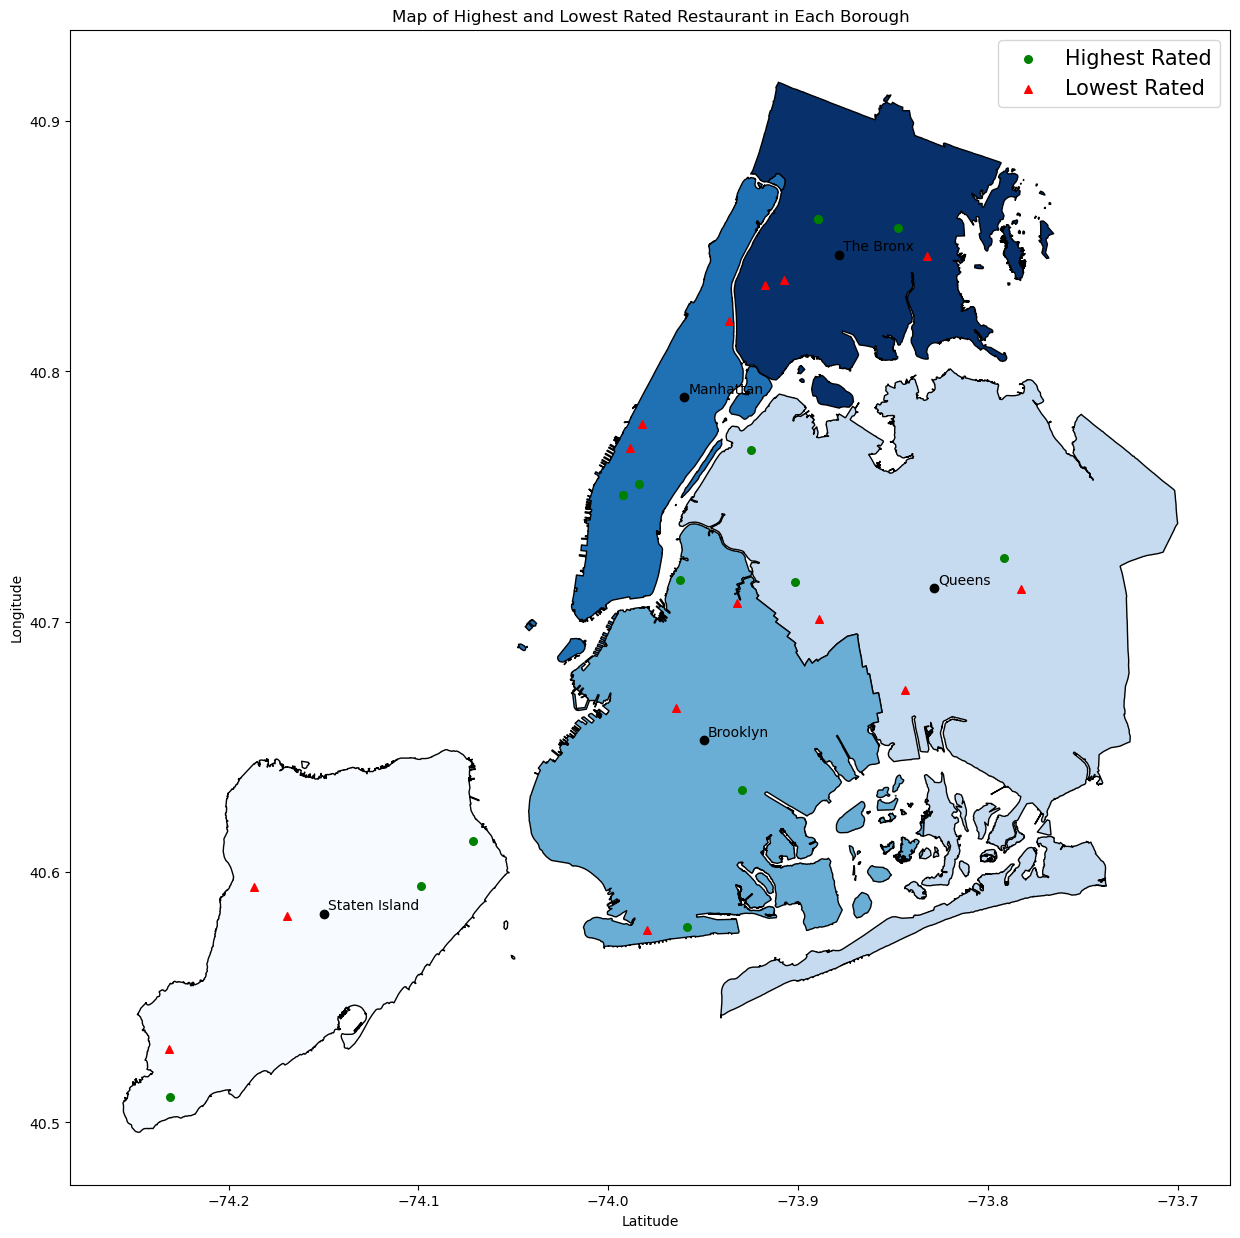

In [19]:
fig1, ax1 = plt.subplots(figsize = (15, 15))
boros.to_crs("EPSG:4326").plot(ax = ax1, cmap = "Blues", color = "xkcd:sky blue", edgecolor = "black")
boro_locations.plot(ax = ax1, color = "black")
geo_df[geo_df['score'] < 2].plot(ax = ax1, markersize = 30, color = 'green', marker = 'o', label = 'Highest Rated')
geo_df[geo_df['score'] > 2].plot(ax = ax1, markersize = 30, color = 'red', marker = '^', label = 'Lowest Rated')
for x, y, label in zip(boro_locations.geometry.x, boro_locations.geometry.y, boro_locations.name):
    ax1.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points")
plt.legend(prop = {'size':15})
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Map of Highest and Lowest Rated Restaurant in Each Borough")